<a href="https://colab.research.google.com/github/mradulpandya/The-Sparks-Foundation-Tasks/blob/main/Prediction_using_Supervised_ML(Task_1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **The Sparks Foundation - Data Science & Business Analytics **

**Author - Mradul Pandya**

**Task 1 - Prediction using Supervised ML**

**Problem Statement** - Predict the percentage of an student based on the no. of study hours. What will be predicted score if a student studies for 9.25 hrs/ day?


**Importing Libraries**

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

**Reading Data From URL**

In [18]:
url = 'http://bit.ly/w-data'
Data = pd.read_csv(url)
print(Data)

    Hours  Scores
0     2.5      21
1     5.1      47
2     3.2      27
3     8.5      75
4     3.5      30
5     1.5      20
6     9.2      88
7     5.5      60
8     8.3      81
9     2.7      25
10    7.7      85
11    5.9      62
12    4.5      41
13    3.3      42
14    1.1      17
15    8.9      95
16    2.5      30
17    1.9      24
18    6.1      67
19    7.4      69
20    2.7      30
21    4.8      54
22    3.8      35
23    6.9      76
24    7.8      86


**Getting Information About Dataset**

In [6]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


**Descrbing The Dataset** 

In [7]:
Data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


**Visualizing Data**

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f43f9cf02d0>,
      dtype=object)

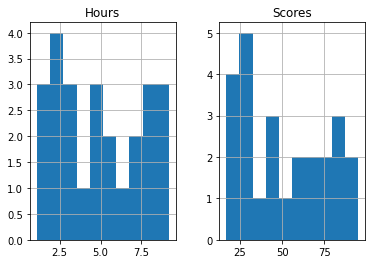

In [10]:
Data.hist()

This histogram allows you to see the frequency distribution of a data set. It offers an “at a glance” picture of a distribution pattern.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


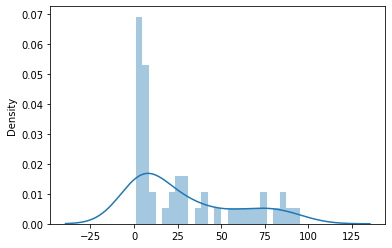

In [13]:
sb.distplot(Data,bins=25)

The distplot represents the univariate distribution of data i.e. data distribution of a variable against the density distribution.

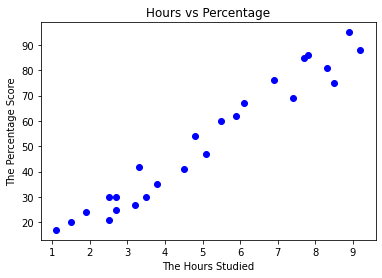

In [19]:
plt.scatter(x=Data['Hours'], y=Data['Scores'], c ="blue")  
plt.title('Hours vs Percentage')    
plt.xlabel('The Hours Studied')    
plt.ylabel('The Percentage Score')    
plt.show()  
plt.show()

Scatter plots are used to observe relationship between variables and uses dots to represent the relationship between them.

{'bodies': [<matplotlib.collections.PolyCollection at 0x7f43f62abb90>,
 'cbars': <matplotlib.collections.LineCollection at 0x7f43f61f3390>,
 'cmaxes': <matplotlib.collections.LineCollection at 0x7f43f62aba90>,
 'cmins': <matplotlib.collections.LineCollection at 0x7f43f61f3690>}

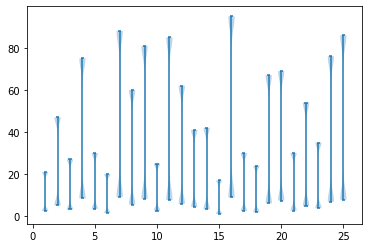

In [15]:
plt.violinplot(Data, bw_method=0.1)

Violin plots are used when you want to observe the distribution of numeric data, and are especially useful when you want to make a comparison of distributions between multiple groups. The peaks, valleys, and tails of each group's density curve can be compared to see where groups are similar or different.

**Preparing Data**

In [11]:
X = Data.iloc[:, :-1].values    
y = Data.iloc[:, 1].values 

**Spliting the data into Test and Train sets**





In [12]:
from sklearn.model_selection import train_test_split    
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=0)

**Training The Model**

In [21]:
from sklearn.linear_model import LinearRegression    
regression = LinearRegression()    
regression.fit(X_train, y_train)   

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [22]:
y_pred = regression.predict(X_test)

In [26]:
Data = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
Data

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


**Seaborn's lmplot is a 2D scatterplot with an optional overlaid regression line. This is useful for comparing numeric variables. Logistic regression for binary classification is also supported with lmplot .**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


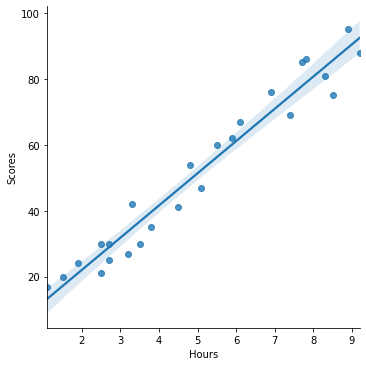

In [16]:
sb.lmplot('Hours','Scores',Data)

**Making Predictions**

In [24]:
Hours = [[9.25]]  
prediction = regression.predict(Hours)  
print("Number of hours = {}".format(Hours))  
print("Prediction Score = {}".format(prediction[0]))  

Number of hours = [[9.25]]
Prediction Score = 93.69173248737539


**Evaluating Model**

In [ ]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))